In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [18]:
rho = 11e3
Omega = 2*np.pi/86400
R = 3486e3

In [62]:
U0 = 1e-5
omega = Omega/(6*365)

In [63]:
def fx(alpha, lat, N, omega):
    expr = (N**2 - omega**2)*(omega**2 - 4*Omega**2*np.sin(lat)**2) + 4*omega**2*Omega**2*np.cos(lat)**2*np.sin(alpha)**2
    
    if expr < 0:
        return 0.0

    return np.cos(lat)*np.sqrt(expr)*np.cos(alpha)**2

In [64]:
def Fxintalpha(N,omega,lat):
 return quad(fx, 0, 2*np.pi, args=(lat, N, omega), limit=1000, epsabs=1e-10, epsrel=1e-10)[0]

In [65]:
# Vectorize over latitude
latitudes = np.linspace(0, np.pi/2, 100) 
Fx_vec = np.vectorize(lambda lat: Fxintalpha(0, omega, lat))
form_drag_x = Fx_vec(latitudes)

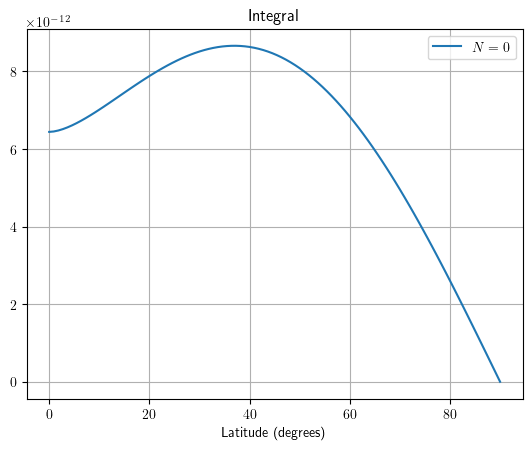

In [66]:
# Plotting
plt.rc('text', usetex=True)
plt.plot(np.degrees(latitudes), form_drag_x, label=r'$N=0$')
plt.xlabel("Latitude (degrees)")
plt.title("Integral")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Wrapper for latitude integration, including Jacobian (R^2 cos(lat)) and accounting for the integral over longitudes
def integrand(lat, N, omega):
    return 2 * np.pi * R**3 * np.cos(lat) * (Fxintalpha(N, omega, lat)) 

In [68]:
N_values = np.linspace(0., Omega, 11) 
results = []

for N in N_values:
    torque, _ = quad(
        integrand,
        -np.pi/2,
        np.pi/2,
        args=(N,omega),
        limit=1000,
        epsabs=1e-10,
        epsrel=1e-10
    )
    print(torque)
    results.append(torque)

3928094139.130908
7317734.142582208
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [69]:
k0 = 2*np.pi/1e6
H = 0.7
hrms = 5e3

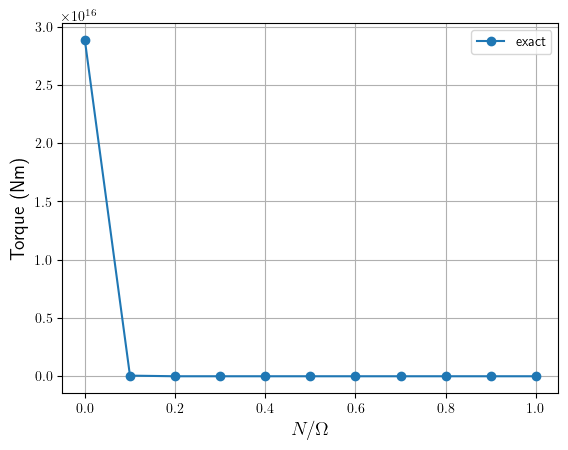

In [71]:
plt.plot(N_values/Omega,(rho/4/np.pi**3)*(hrms**2*k0*H/(2*H-1))*(U0/omega)*np.array(results), marker='o', linestyle='-', label="exact")
plt.xlabel(r'$N/\Omega$', fontsize=14)
plt.ylabel(r'Torque (Nm)', fontsize=14)
plt.legend()
plt.grid(True)